# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [45]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [46]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
   ---> 1000 total reviews


In [47]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,Not Verified | My itinerary was supposed to b...
1,✅ Trip Verified | Busy day at LHR and flight ...
2,✅ Trip Verified | Worst seats I have ever enco...
3,Not Verified | Top Ten REASONS to not use Brit...
4,Not Verified | Easy check in on the way to He...


,reviews
0,Not Verified | My itinerary was supposed to b...
1,✅ Trip Verified | Busy day at LHR and flight ...
2,✅ Trip Verified | Worst seats I have ever enco...
3,Not Verified | Top Ten REASONS to not use Brit...
4,Not Verified | Easy check in on the way to He...


In [48]:
df.to_csv("BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [49]:
df.head(5)

,reviews
0,Not Verified | My itinerary was supposed to b...
1,✅ Trip Verified | Busy day at LHR and flight ...
2,✅ Trip Verified | Worst seats I have ever enco...
3,Not Verified | Top Ten REASONS to not use Brit...
4,Not Verified | Easy check in on the way to He...


,reviews
0,Not Verified | My itinerary was supposed to b...
1,✅ Trip Verified | Busy day at LHR and flight ...
2,✅ Trip Verified | Worst seats I have ever enco...
3,Not Verified | Top Ten REASONS to not use Brit...
4,Not Verified | Easy check in on the way to He...


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [51]:
df.describe()

,reviews
count,1000
unique,1000
top,✅ Trip Verified | Easy check in and staff mem...
freq,1


,reviews
count,1000
unique,1000
top,✅ Trip Verified | Easy check in and staff mem...
freq,1


In [52]:
df["reviews"]= df["reviews"].str.split("|", n = 2, expand = False)  

In [53]:
df['reviews']

0      [Not Verified ,   My itinerary was supposed to...
1      [✅ Trip Verified ,   Busy day at LHR and fligh...
2      [✅ Trip Verified ,  Worst seats I have ever en...
3      [Not Verified ,  Top Ten REASONS to not use Br...
4      [Not Verified ,   Easy check in on the way to ...
                             ...                        
995    [✅ Trip Verified ,   London to Frankfurt. I ne...
996    [✅ Trip Verified ,  Gatwick to Malaga. When bo...
997    [✅ Trip Verified ,   Bermuda to Gatwick. Usual...
998    [✅ Trip Verified ,   Aberdeen to Boston via Lo...
999    [✅ Trip Verified ,   London to Hamburg. Baggag...
Name: reviews, Length: 1000, dtype: object

0      [Not Verified ,   My itinerary was supposed to...
1      [✅ Trip Verified ,   Busy day at LHR and fligh...
2      [✅ Trip Verified ,  Worst seats I have ever en...
3      [Not Verified ,  Top Ten REASONS to not use Br...
4      [Not Verified ,   Easy check in on the way to ...
                             ...                        
995    [✅ Trip Verified ,   London to Frankfurt. I ne...
996    [✅ Trip Verified ,  Gatwick to Malaga. When bo...
997    [✅ Trip Verified ,   Bermuda to Gatwick. Usual...
998    [✅ Trip Verified ,   Aberdeen to Boston via Lo...
999    [✅ Trip Verified ,   London to Hamburg. Baggag...
Name: reviews, Length: 1000, dtype: object

In [54]:
for i in df["reviews"]:
    i.remove(i[0])

In [55]:
df['reviews'][3]

[' Top Ten REASONS to not use British Airways To all: Be Aware and be on Notice- Travel at your own risk I have travelled for years on many different airlines, and I have to say that British Airways ranks as one of the top two most horrible airlines to fly. Don’t waste your time or money. Customer service is non-existent. Please be on notice that if you purchase a ticket from them and once, they have your money, you can kiss any customer service and or help resolving your issue goodbye. We used them to travel to Europe and it was the worst experience I have had with an airline in years. When you work hard and save your money to travel, you expect a good experience. Welp not with this company. Who I am sure, makes millions on customers per year. I understand that sometimes things happen, but this started right after we booked our flight AND THE BAD EXPERIENCE DID NOT END UNTIL WE SET FOOT BACK TO OUR HOMETOWN. Please take note: #1 - The customer service number is buried on the internet 

[' Top Ten REASONS to not use British Airways To all: Be Aware and be on Notice- Travel at your own risk I have travelled for years on many different airlines, and I have to say that British Airways ranks as one of the top two most horrible airlines to fly. Don’t waste your time or money. Customer service is non-existent. Please be on notice that if you purchase a ticket from them and once, they have your money, you can kiss any customer service and or help resolving your issue goodbye. We used them to travel to Europe and it was the worst experience I have had with an airline in years. When you work hard and save your money to travel, you expect a good experience. Welp not with this company. Who I am sure, makes millions on customers per year. I understand that sometimes things happen, but this started right after we booked our flight AND THE BAD EXPERIENCE DID NOT END UNTIL WE SET FOOT BACK TO OUR HOMETOWN. Please take note: #1 - The customer service number is buried on the internet 

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [57]:
df['reviews']

0      [  My itinerary was supposed to be Las Vegas-C...
1      [  Busy day at LHR and flight full. Lounge cro...
2      [ Worst seats I have ever encountered in econo...
3      [ Top Ten REASONS to not use British Airways T...
4      [  Easy check in on the way to Heathrow. The f...
                             ...                        
995    [  London to Frankfurt. I need to fly BA for B...
996    [ Gatwick to Malaga. When booking the tickets,...
997    [  Bermuda to Gatwick. Usual window and Aisle ...
998    [  Aberdeen to Boston via London Heathrow. I f...
999    [  London to Hamburg. Baggage self-check-in wa...
Name: reviews, Length: 1000, dtype: object

0      [  My itinerary was supposed to be Las Vegas-C...
1      [  Busy day at LHR and flight full. Lounge cro...
2      [ Worst seats I have ever encountered in econo...
3      [ Top Ten REASONS to not use British Airways T...
4      [  Easy check in on the way to Heathrow. The f...
                             ...                        
995    [  London to Frankfurt. I need to fly BA for B...
996    [ Gatwick to Malaga. When booking the tickets,...
997    [  Bermuda to Gatwick. Usual window and Aisle ...
998    [  Aberdeen to Boston via London Heathrow. I f...
999    [  London to Hamburg. Baggage self-check-in wa...
Name: reviews, Length: 1000, dtype: object

In [58]:
 df.head(4)

,reviews
0,[ My itinerary was supposed to be Las Vegas-C...
1,[ Busy day at LHR and flight full. Lounge cro...
2,[ Worst seats I have ever encountered in econo...
3,[ Top Ten REASONS to not use British Airways T...


,reviews
0,[ My itinerary was supposed to be Las Vegas-C...
1,[ Busy day at LHR and flight full. Lounge cro...
2,[ Worst seats I have ever encountered in econo...
3,[ Top Ten REASONS to not use British Airways T...


In [59]:
#converting lists to strings
#[1]
df['reviews'] = [','.join(map(str, l)) for l in df['reviews']]

In [60]:
df['reviews']

0        My itinerary was supposed to be Las Vegas-Ch...
1        Busy day at LHR and flight full. Lounge crow...
2       Worst seats I have ever encountered in econom...
3       Top Ten REASONS to not use British Airways To...
4        Easy check in on the way to Heathrow. The fl...
                             ...                        
995      London to Frankfurt. I need to fly BA for Bu...
996     Gatwick to Malaga. When booking the tickets, ...
997      Bermuda to Gatwick. Usual window and Aisle s...
998      Aberdeen to Boston via London Heathrow. I fo...
999      London to Hamburg. Baggage self-check-in was...
Name: reviews, Length: 1000, dtype: object

0        My itinerary was supposed to be Las Vegas-Ch...
1        Busy day at LHR and flight full. Lounge crow...
2       Worst seats I have ever encountered in econom...
3       Top Ten REASONS to not use British Airways To...
4        Easy check in on the way to Heathrow. The fl...
                             ...                        
995      London to Frankfurt. I need to fly BA for Bu...
996     Gatwick to Malaga. When booking the tickets, ...
997      Bermuda to Gatwick. Usual window and Aisle s...
998      Aberdeen to Boston via London Heathrow. I fo...
999      London to Hamburg. Baggage self-check-in was...
Name: reviews, Length: 1000, dtype: object

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [62]:
df.head(10)

,reviews
0,My itinerary was supposed to be Las Vegas-Ch...
1,Busy day at LHR and flight full. Lounge crow...
2,Worst seats I have ever encountered in econom...
3,Top Ten REASONS to not use British Airways To...
4,Easy check in on the way to Heathrow. The fl...
5,Online check in worked fine. Quick security ...
6,. The BA first lounge at Terminal 5 was a zoo...
7,Paid a quick visit to Nice yesterday from Hea...
8,Words fail to describe this last awful fligh...
9,Absolutely terrible experience. The app woul...


,reviews
0,My itinerary was supposed to be Las Vegas-Ch...
1,Busy day at LHR and flight full. Lounge crow...
2,Worst seats I have ever encountered in econom...
3,Top Ten REASONS to not use British Airways To...
4,Easy check in on the way to Heathrow. The fl...
5,Online check in worked fine. Quick security ...
6,. The BA first lounge at Terminal 5 was a zoo...
7,Paid a quick visit to Nice yesterday from Hea...
8,Words fail to describe this last awful fligh...
9,Absolutely terrible experience. The app woul...


In [63]:
#removing the spaces in the start and end f the text
#[2]
df[df.columns] = df.apply(lambda x: x.str.strip())

In [64]:
df.head(10)

,reviews
0,My itinerary was supposed to be Las Vegas-Chic...
1,Busy day at LHR and flight full. Lounge crowde...
2,Worst seats I have ever encountered in economy...
3,Top Ten REASONS to not use British Airways To ...
4,Easy check in on the way to Heathrow. The flig...
5,Online check in worked fine. Quick security ch...
6,. The BA first lounge at Terminal 5 was a zoo...
7,Paid a quick visit to Nice yesterday from Heat...
8,Words fail to describe this last awful flight ...
9,Absolutely terrible experience. The app would ...


,reviews
0,My itinerary was supposed to be Las Vegas-Chic...
1,Busy day at LHR and flight full. Lounge crowde...
2,Worst seats I have ever encountered in economy...
3,Top Ten REASONS to not use British Airways To ...
4,Easy check in on the way to Heathrow. The flig...
5,Online check in worked fine. Quick security ch...
6,. The BA first lounge at Terminal 5 was a zoo...
7,Paid a quick visit to Nice yesterday from Heat...
8,Words fail to describe this last awful flight ...
9,Absolutely terrible experience. The app would ...


In [65]:
df['reviews'][5]

'Online check in worked fine. Quick security check. Once onboard quick flight up to Glasgow, water and snack provided. All in all very pleased. Cheap, quick and efficient.'

'Online check in worked fine. Quick security check. Once onboard quick flight up to Glasgow, water and snack provided. All in all very pleased. Cheap, quick and efficient.'

In [66]:
#data cleaning 
#1:remove unicode characters
#2: lower the case
#3:remove stopwords :words that dont give meaning in english
#4:
[3]
#Remove punctuation/lower casing
# Load the regular expression library
import re
# Remove punctuation (unicode characters)
df['reviews_processed'] = \
df['reviews'].map(lambda x: re.sub('(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?', '', x))
# Convert the titles to lowercase
df['reviews_processed'] = \
df['reviews_processed'].map(lambda x: x.lower())
# Print out the first rows of papers
df['reviews_processed'].head()

0    my itinerary was supposed to be las vegaschica...
1    busy day at lhr and flight full lounge crowded...
2    worst seats i have ever encountered in economy...
3    top ten reasons to not use british airways to ...
4    easy check in on the way to heathrow the fligh...
Name: reviews_processed, dtype: object

0    my itinerary was supposed to be las vegaschica...
1    busy day at lhr and flight full lounge crowded...
2    worst seats i have ever encountered in economy...
3    top ten reasons to not use british airways to ...
4    easy check in on the way to heathrow the fligh...
Name: reviews_processed, dtype: object

In [67]:
import nltk.corpus
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\eng_m\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\eng_m\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [68]:
stop = stopwords.words('english')
df['reviews_processed'].map(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

0      itinerary supposed las vegaschicagolondonvenic...
1      busy day lhr flight full lounge crowded b gate...
2      worst seats ever encountered economy class leg...
3      top ten reasons use british airways aware noti...
4      easy check way heathrow flight time issues ret...
                             ...                        
995    london frankfurt need fly ba business frequent...
996    gatwick malaga booking tickets realised choosi...
997    bermuda gatwick usual window aisle seat taken ...
998    aberdeen boston via london heathrow found seat...
999    london hamburg baggage selfcheckin diabolical ...
Name: reviews_processed, Length: 1000, dtype: object

0      itinerary supposed las vegaschicagolondonvenic...
1      busy day lhr flight full lounge crowded b gate...
2      worst seats ever encountered economy class leg...
3      top ten reasons use british airways aware noti...
4      easy check way heathrow flight time issues ret...
                             ...                        
995    london frankfurt need fly ba business frequent...
996    gatwick malaga booking tickets realised choosi...
997    bermuda gatwick usual window aisle seat taken ...
998    aberdeen boston via london heathrow found seat...
999    london hamburg baggage selfcheckin diabolical ...
Name: reviews_processed, Length: 1000, dtype: object

In [69]:
df.head()

,reviews,reviews_processed
0,My itinerary was supposed to be Las Vegas-Chic...,my itinerary was supposed to be las vegaschica...
1,Busy day at LHR and flight full. Lounge crowde...,busy day at lhr and flight full lounge crowded...
2,Worst seats I have ever encountered in economy...,worst seats i have ever encountered in economy...
3,Top Ten REASONS to not use British Airways To ...,top ten reasons to not use british airways to ...
4,Easy check in on the way to Heathrow. The flig...,easy check in on the way to heathrow the fligh...


,reviews,reviews_processed
0,My itinerary was supposed to be Las Vegas-Chic...,my itinerary was supposed to be las vegaschica...
1,Busy day at LHR and flight full. Lounge crowde...,busy day at lhr and flight full lounge crowded...
2,Worst seats I have ever encountered in economy...,worst seats i have ever encountered in economy...
3,Top Ten REASONS to not use British Airways To ...,top ten reasons to not use british airways to ...
4,Easy check in on the way to Heathrow. The flig...,easy check in on the way to heathrow the fligh...


In [70]:
 pip install wordcloud

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [71]:
pip install --upgrade pillow

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


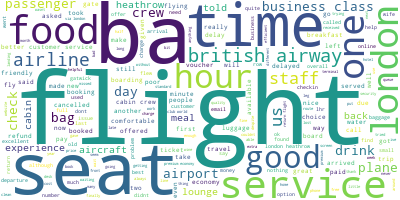

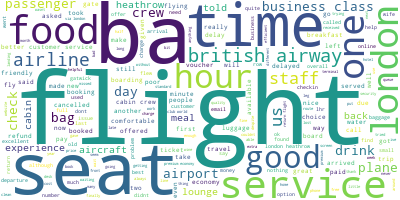

In [72]:
#data exploratory
#[3]
# Import the wordcloud library
#from wordcloud import WordCloud
import re  
import matplotlib.pyplot as plt  
from wordcloud import WordCloud, STOPWORDS 
# Join the different processed titles together.
long_string = ','.join(list(df['reviews_processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

### The words 'flight' ,'london' , 'seat' , 'service' ,'time' are the most frequent words in the sentences 

In [73]:
df['reviews_processed']

0      my itinerary was supposed to be las vegaschica...
1      busy day at lhr and flight full lounge crowded...
2      worst seats i have ever encountered in economy...
3      top ten reasons to not use british airways to ...
4      easy check in on the way to heathrow the fligh...
                             ...                        
995    london to frankfurt i need to fly ba for busin...
996    gatwick to malaga when booking the tickets i r...
997    bermuda to gatwick usual window and aisle seat...
998    aberdeen to boston via london heathrow i found...
999    london to hamburg baggage selfcheckin was diab...
Name: reviews_processed, Length: 1000, dtype: object

0      my itinerary was supposed to be las vegaschica...
1      busy day at lhr and flight full lounge crowded...
2      worst seats i have ever encountered in economy...
3      top ten reasons to not use british airways to ...
4      easy check in on the way to heathrow the fligh...
                             ...                        
995    london to frankfurt i need to fly ba for busin...
996    gatwick to malaga when booking the tickets i r...
997    bermuda to gatwick usual window and aisle seat...
998    aberdeen to boston via london heathrow i found...
999    london to hamburg baggage selfcheckin was diab...
Name: reviews_processed, Length: 1000, dtype: object

In [74]:
pip install -U textblob

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [75]:
from textblob import TextBlob

In [76]:
#[5]
#the Polarity 
p_1 = TextBlob(df['reviews_processed'][1]).sentiment.polarity

#the Subjectivity
s_1 = TextBlob(df['reviews_processed'][1]).sentiment.subjectivity

print("Polarity of Text 1 is", p_1)
print("Subjectivity of Text 1 is", s_1)

Polarity of Text 1 is 0.32393939393939397
Subjectivity of Text 1 is 0.45272727272727276
Polarity of Text 1 is 0.32393939393939397
Subjectivity of Text 1 is 0.45272727272727276


In [77]:
df[['polarity', 'subjectivity']] = df['reviews_processed'].apply(lambda reviews_processed: pd.Series(TextBlob(reviews_processed).sentiment))

In [78]:
df

,reviews,reviews_processed,polarity,subjectivity
0,My itinerary was supposed to be Las Vegas-Chic...,my itinerary was supposed to be las vegaschica...,-0.027485,0.471345
1,Busy day at LHR and flight full. Lounge crowde...,busy day at lhr and flight full lounge crowded...,0.323939,0.452727
2,Worst seats I have ever encountered in economy...,worst seats i have ever encountered in economy...,0.071429,0.351190
3,Top Ten REASONS to not use British Airways To ...,top ten reasons to not use british airways to ...,0.047209,0.533032
4,Easy check in on the way to Heathrow. The flig...,easy check in on the way to heathrow the fligh...,0.096667,0.306667
...,...,...,...,...
995,London to Frankfurt. I need to fly BA for Busi...,london to frankfurt i need to fly ba for busin...,0.021875,0.559375
996,"Gatwick to Malaga. When booking the tickets, I...",gatwick to malaga when booking the tickets i r...,0.524911,0.756429
997,Bermuda to Gatwick. Usual window and Aisle sea...,bermuda to gatwick usual window and aisle seat...,0.051667,0.457500
998,Aberdeen to Boston via London Heathrow. I foun...,aberdeen to boston via london heathrow i found...,0.040000,0.365000


,reviews,reviews_processed,polarity,subjectivity
0,My itinerary was supposed to be Las Vegas-Chic...,my itinerary was supposed to be las vegaschica...,-0.027485,0.471345
1,Busy day at LHR and flight full. Lounge crowde...,busy day at lhr and flight full lounge crowded...,0.323939,0.452727
2,Worst seats I have ever encountered in economy...,worst seats i have ever encountered in economy...,0.071429,0.351190
3,Top Ten REASONS to not use British Airways To ...,top ten reasons to not use british airways to ...,0.047209,0.533032
4,Easy check in on the way to Heathrow. The flig...,easy check in on the way to heathrow the fligh...,0.096667,0.306667
...,...,...,...,...
995,London to Frankfurt. I need to fly BA for Busi...,london to frankfurt i need to fly ba for busin...,0.021875,0.559375
996,"Gatwick to Malaga. When booking the tickets, I...",gatwick to malaga when booking the tickets i r...,0.524911,0.756429
997,Bermuda to Gatwick. Usual window and Aisle sea...,bermuda to gatwick usual window and aisle seat...,0.051667,0.457500
998,Aberdeen to Boston via London Heathrow. I foun...,aberdeen to boston via london heathrow i found...,0.040000,0.365000


In [79]:
df.describe()

,polarity,subjectivity
count,1000.000000,1000.000000
mean,0.079185,0.490787
std,0.198935,0.127226
min,-0.766667,0.000000
25%,-0.039676,0.416258
50%,0.067247,0.490188
75%,0.196765,0.565606
max,0.715000,0.950000


,polarity,subjectivity
count,1000.000000,1000.000000
mean,0.079185,0.490787
std,0.198935,0.127226
min,-0.766667,0.000000
25%,-0.039676,0.416258
50%,0.067247,0.490188
75%,0.196765,0.565606
max,0.715000,0.950000


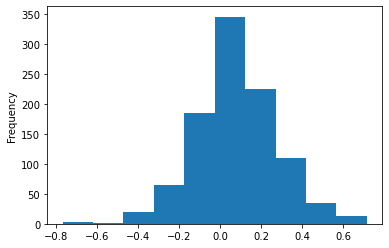

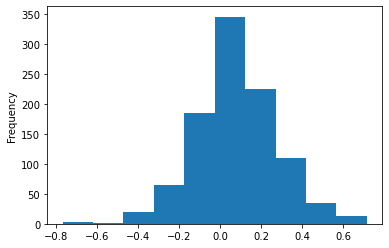

In [80]:
df.polarity.plot(kind='hist')
plt.show()

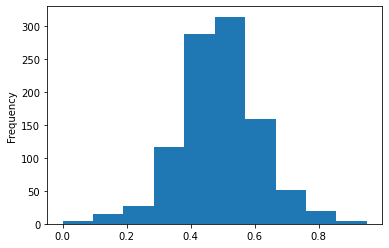

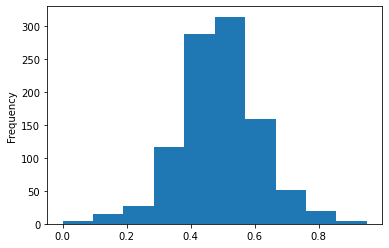

In [81]:
df.subjectivity.plot(kind='hist')
plt.show()

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.offsetbox import AnchoredText
%matplotlib inline

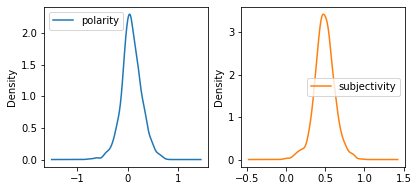

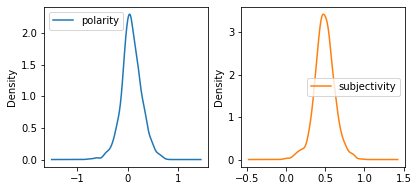

In [83]:
# reference [6]:
df.plot(kind='density', subplots=True, layout=(3,3), sharex=False,figsize=(10,10))
plt.show()

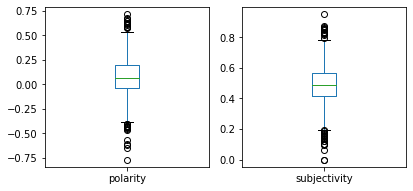

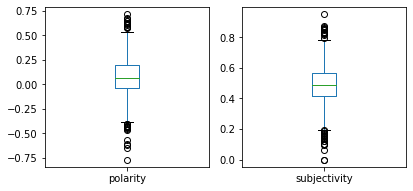

In [84]:
df.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False,figsize=(10,10))
plt.show()

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   reviews            1000 non-null   object 
 1   reviews_processed  1000 non-null   object 
 2   polarity           1000 non-null   float64
 3   subjectivity       1000 non-null   float64
dtypes: float64(2), object(2)
memory usage: 31.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   reviews            1000 non-null   object 
 1   reviews_processed  1000 non-null   object 
 2   polarity           1000 non-null   float64
 3   subjectivity       1000 non-null   float64
dtypes: float64(2), object(2)
memory usage: 31.4+ KB


In [86]:
df.drop(['reviews'],axis=1,inplace=True)

In [87]:
df.head(10)

,reviews_processed,polarity,subjectivity
0,my itinerary was supposed to be las vegaschica...,-0.027485,0.471345
1,busy day at lhr and flight full lounge crowded...,0.323939,0.452727
2,worst seats i have ever encountered in economy...,0.071429,0.351190
3,top ten reasons to not use british airways to ...,0.047209,0.533032
4,easy check in on the way to heathrow the fligh...,0.096667,0.306667
5,online check in worked fine quick security che...,0.411111,0.616667
6,the ba first lounge at terminal 5 was a zoo a...,-0.089712,0.499853
7,paid a quick visit to nice yesterday from heat...,0.209470,0.450985
8,words fail to describe this last awful flight ...,-0.224058,0.563284
9,absolutely terrible experience the app would n...,-0.233929,0.476190


,reviews_processed,polarity,subjectivity
0,my itinerary was supposed to be las vegaschica...,-0.027485,0.471345
1,busy day at lhr and flight full lounge crowded...,0.323939,0.452727
2,worst seats i have ever encountered in economy...,0.071429,0.351190
3,top ten reasons to not use british airways to ...,0.047209,0.533032
4,easy check in on the way to heathrow the fligh...,0.096667,0.306667
5,online check in worked fine quick security che...,0.411111,0.616667
6,the ba first lounge at terminal 5 was a zoo a...,-0.089712,0.499853
7,paid a quick visit to nice yesterday from heat...,0.209470,0.450985
8,words fail to describe this last awful flight ...,-0.224058,0.563284
9,absolutely terrible experience the app would n...,-0.233929,0.476190


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   reviews_processed  1000 non-null   object 
 1   polarity           1000 non-null   float64
 2   subjectivity       1000 non-null   float64
dtypes: float64(2), object(1)
memory usage: 23.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   reviews_processed  1000 non-null   object 
 1   polarity           1000 non-null   float64
 2   subjectivity       1000 non-null   float64
dtypes: float64(2), object(1)
memory usage: 23.6+ KB


In [103]:
#df[['polarity', 'subjectivity']] = df['reviews_processed'].apply(lambda reviews_processed: pd.Series(TextBlob(reviews_processed).sentiment))

df[['pol']]=df['polarity'].apply(lambda polarity: True if polarity > 0 else False)  

In [104]:
df

,reviews_processed,polarity,subjectivity,pol
0,my itinerary was supposed to be las vegaschica...,-0.027485,0.471345,False
1,busy day at lhr and flight full lounge crowded...,0.323939,0.452727,True
2,worst seats i have ever encountered in economy...,0.071429,0.351190,True
3,top ten reasons to not use british airways to ...,0.047209,0.533032,True
4,easy check in on the way to heathrow the fligh...,0.096667,0.306667,True
...,...,...,...,...
995,london to frankfurt i need to fly ba for busin...,0.021875,0.559375,True
996,gatwick to malaga when booking the tickets i r...,0.524911,0.756429,True
997,bermuda to gatwick usual window and aisle seat...,0.051667,0.457500,True
998,aberdeen to boston via london heathrow i found...,0.040000,0.365000,True


,reviews_processed,polarity,subjectivity,pol
0,my itinerary was supposed to be las vegaschica...,-0.027485,0.471345,False
1,busy day at lhr and flight full lounge crowded...,0.323939,0.452727,True
2,worst seats i have ever encountered in economy...,0.071429,0.351190,True
3,top ten reasons to not use british airways to ...,0.047209,0.533032,True
4,easy check in on the way to heathrow the fligh...,0.096667,0.306667,True
...,...,...,...,...
995,london to frankfurt i need to fly ba for busin...,0.021875,0.559375,True
996,gatwick to malaga when booking the tickets i r...,0.524911,0.756429,True
997,bermuda to gatwick usual window and aisle seat...,0.051667,0.457500,True
998,aberdeen to boston via london heathrow i found...,0.040000,0.365000,True


In [105]:
df.pol.value_counts()

True     663
False    337
Name: pol, dtype: int64

True     663
False    337
Name: pol, dtype: int64

In [88]:
df.describe()

,polarity,subjectivity
count,1000.000000,1000.000000
mean,0.079185,0.490787
std,0.198935,0.127226
min,-0.766667,0.000000
25%,-0.039676,0.416258
50%,0.067247,0.490188
75%,0.196765,0.565606
max,0.715000,0.950000


,polarity,subjectivity
count,1000.000000,1000.000000
mean,0.079185,0.490787
std,0.198935,0.127226
min,-0.766667,0.000000
25%,-0.039676,0.416258
50%,0.067247,0.490188
75%,0.196765,0.565606
max,0.715000,0.950000


### The averagre subjectivity for the reviews is almost 0.5 and the reviews are 0.08 in average which means it tends to be negative .So,this is indication that the average opinion is negative and that there are problems related to the most repeated words mentioned earlier ('seat' , 'service' ,'time','food') which needs to be more invistegated.

# References:

[1] https://stackoverflow.com/questions/45306988/column-of-lists-convert-list-to-string-as-a-new-column

[2] https://stackoverflow.com/questions/40950310/strip-trim-all-strings-of-a-dataframe

[3] https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0

[4] https://blog.csdn.net/Birdy_cee/article/details/130693238

[5] https://www.analyticsvidhya.com/blog/2022/07/sentiment-analysis-using-python/

[6] S.Sotiriadis Class 7: Introduction to Data Modelling [PowerPoint Slides].Available: https://moodle.bbk.ac.uk/mod/folder/view.php?id=1881640


